In [2]:
import torchvision.datasets as datasets

train_dataset = datasets.EMNIST(root='./data', split='letters', train=True, download=True)
test_dataset = datasets.EMNIST(root='./data', split='letters', train=False, download=True)

x_train, y_train = train_dataset.data.numpy(), train_dataset.targets.numpy()
x_test, y_test = test_dataset.data.numpy(), test_dataset.targets.numpy()

print(f"Train data shape: {x_train.shape}, Train labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")


Train data shape: (124800, 28, 28), Train labels shape: (124800,)
Test data shape: (20800, 28, 28), Test labels shape: (20800,)


In [3]:
x_train,x_test=x_train/255.0, x_test/255.0

x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)


In [4]:
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),  
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),  
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),  
    keras.layers.MaxPooling2D(pool_size=(2,2)), 
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(27,activation='softmax')

])



In [5]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))
test_loss, test_acc=model.evaluate(x_test,y_test)



Epoch 1/10


3760/3900 [===========================>..] - ETA: 1s - loss: 0.6711 - accuracy: 0.7838

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
char_map = [
            'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',  # Lowercase letters
            'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
            '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ]  # Uppercase letters

test_image = x_test[7400].reshape(1, 28, 28, 1)
predict = model.predict(test_image)
predicted_digit = np.argmax(predict)
predicted_char= char_map[predicted_digit-1]
rotated_image = cv2.rotate(test_image[0], cv2.ROTATE_90_CLOCKWISE)
mirrored_image = cv2.flip(rotated_image, 1)
plt.imshow(mirrored_image, cmap='gray')
plt.show()
print(predicted_char)


NameError: name 'x_test' is not defined

1/1 [==============================] - 0s 29ms/step
b


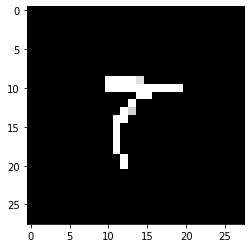

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

char_map = [
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',  # Lowercase letters
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',  # Uppercase letters
]

# Load and process the image
img = image.load_img("r.png", target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)  # Convert the image to an array
mirrored_image = cv2.flip(img_array, 1)
# Rotate the image 90 degrees counterclockwise
rotated_image = cv2.rotate(mirrored_image, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Mirror the image horizontally


# Prepare the image for prediction
imgArray = rotated_image.reshape(1, 28, 28, 1)
imgArray = imgArray / 255.0

# Make prediction
predict1 = model.predict(imgArray)
predicted_digit1 = np.argmax(predict1)

# Convert predicted digit to character
predicted_char = char_map[predicted_digit1]
print(predicted_char)

# Display the processed image
plt.imshow(rotated_image, cmap='gray')
plt.show()